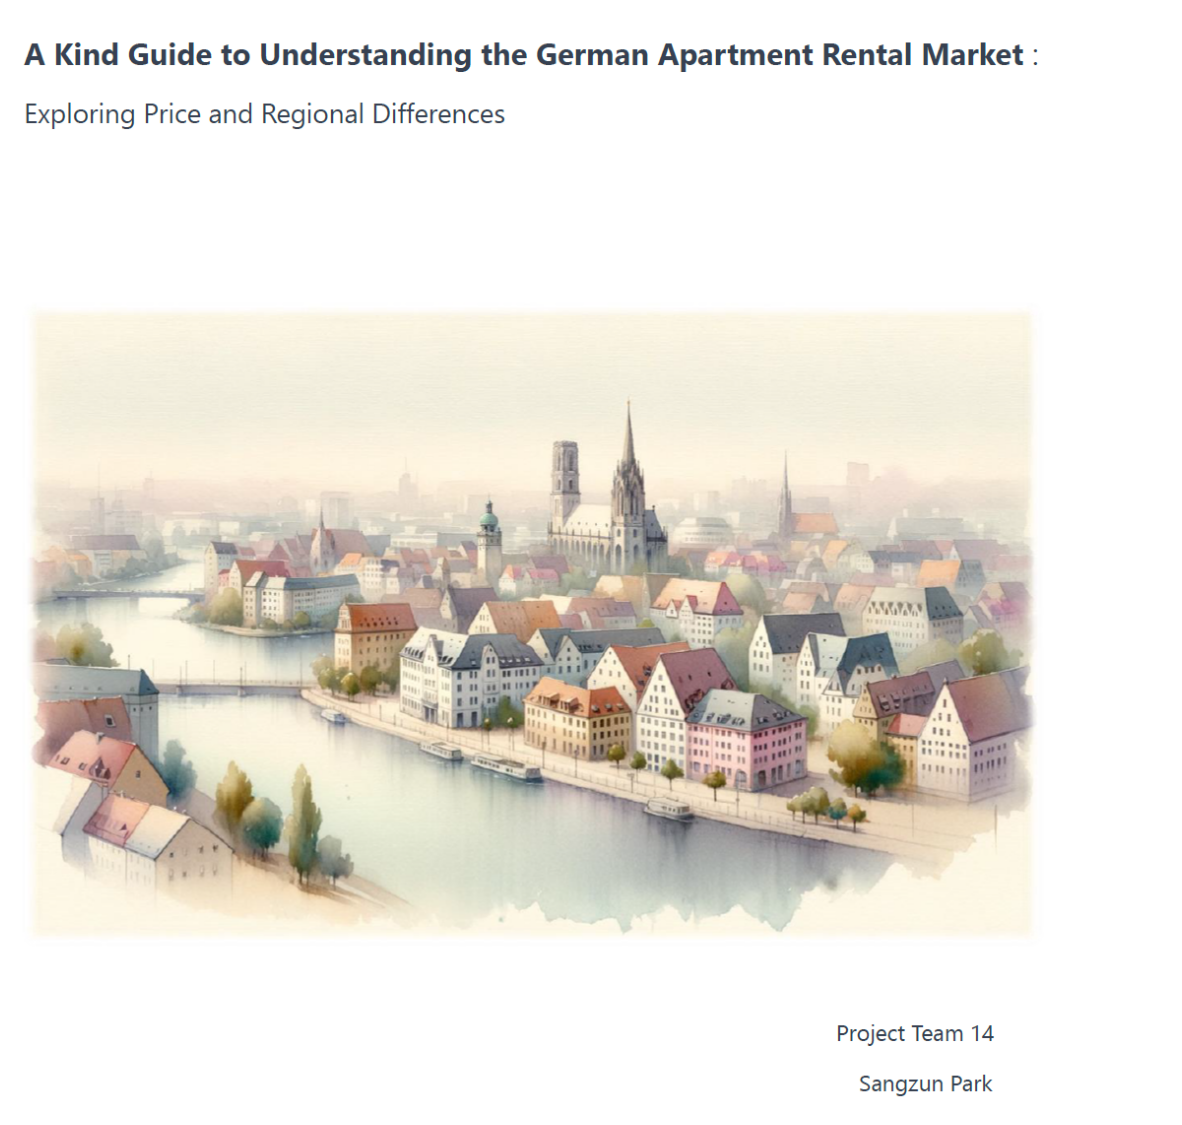

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "cover_2.png" 
img = Image.open(image_path)

plt.figure(figsize=(15, 15)) 

plt.imshow(img)
plt.axis('off') 
plt.show()

# Part 1 / EDA

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import sys
import geopandas as gp
import scipy.stats as stats
import plotly.express as px
sys.version

'3.8.17 (default, Jul  5 2023, 20:44:21) [MSC v.1916 64 bit (AMD64)]'

In [3]:
data = pd.read_csv("immo_data.csv")

In [4]:
# Check col
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 49 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

In [5]:
# Check nan value
nan_count = data.isnull().sum()
print(nan_count)

regio1                           0
serviceCharge                 6909
heatingType                  44856
telekomTvOffer               32619
telekomHybridUploadSpeed    223830
newlyConst                       0
balcony                          0
picturecount                     0
pricetrend                    1832
telekomUploadSpeed           33358
totalRent                    40517
yearConstructed              57045
scoutId                          0
noParkSpaces                175798
firingTypes                  56964
hasKitchen                       0
geo_bln                          0
cellar                           0
yearConstructedRange         57045
baseRent                         0
houseNumber                  71018
livingSpace                      0
geo_krs                          0
condition                    68489
interiorQual                112665
petsAllowed                 114573
street                           0
streetPlain                  71013
lift                

In [6]:
# 1st Features drop based on the characteristic of column
data.drop(columns=['telekomHybridUploadSpeed','telekomUploadSpeed','description','livingSpaceRange','street',
                                 'scoutId','facilities','geo_krs','telekomTvOffer','petsAllowed','pricetrend',
                                 'noRoomsRange','picturecount','houseNumber','streetPlain','firingTypes','interiorQual',
                                 'interiorQual'],inplace=True)

In [7]:
# 2nd features drop based on nan value
data.drop(columns=['electricityKwhPrice','electricityBasePrice','energyEfficiencyClass','lastRefurbish',
                   'heatingCosts','noParkSpaces','thermalChar',],inplace=True)

In [8]:
# Check nan value in columns 
nan_count_v2 = data.isnull().sum()
print(nan_count_v2)

regio1                      0
serviceCharge            6909
heatingType             44856
newlyConst                  0
balcony                     0
totalRent               40517
yearConstructed         57045
hasKitchen                  0
geo_bln                     0
cellar                      0
yearConstructedRange    57045
baseRent                    0
livingSpace                 0
condition               68489
lift                        0
baseRentRange               0
typeOfFlat              36614
geo_plz                     0
noRooms                     0
floor                   51309
numberOfFloors          97732
garden                      0
regio2                      0
regio3                      0
date                        0
dtype: int64


In [9]:
# 3rd features drop low-important columns
data.drop(columns=['yearConstructedRange','numberOfFloors'],inplace=True)

In [10]:
# Apply replacement value 'Other' to columns that are absolutely necessary but have many nan values
columns_to_fillna = ['condition', 'heatingType', 'typeOfFlat']
for column in columns_to_fillna:
    data[column].fillna('Other', inplace=True)

In [11]:
# Delete all rows where the main value total rent is nan (do not replace with other statistical values)
data.dropna(subset=['totalRent'],inplace=True)

In [12]:
# Fill NaN values in floor, yearConstructed, and serviceCharge columns with median values, respectively.
columns_to_fillna = ['floor', 'yearConstructed', 'serviceCharge']

for column in columns_to_fillna:
    median_value = data[column].median()
    data[column].fillna(median_value, inplace=True)

In [13]:
# Outlier handling
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

def remove_outliers(column):
    upper_range = column.mean() + 3 * column.std()
    lower_range = column.mean() - 3 * column.std()
    return (column <= upper_range) & (column >= lower_range)

# Update the data frame, leaving only rows without outliers
data = data[data[numeric_columns].apply(remove_outliers, axis=0).all(axis=1)]

In [14]:
nan_count_v3 = data.isnull().sum()
print(nan_count_v3)

regio1             0
serviceCharge      0
heatingType        0
newlyConst         0
balcony            0
totalRent          0
yearConstructed    0
hasKitchen         0
geo_bln            0
cellar             0
baseRent           0
livingSpace        0
condition          0
lift               0
baseRentRange      0
typeOfFlat         0
geo_plz            0
noRooms            0
floor              0
garden             0
regio2             0
regio3             0
date               0
dtype: int64


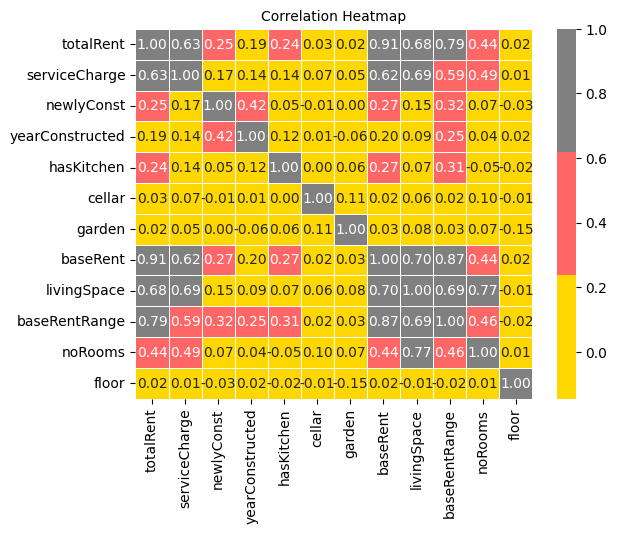

In [15]:
numeric_columns = [ 'totalRent', 'serviceCharge', 'newlyConst', 'yearConstructed','hasKitchen', 'cellar', 
                   'garden', 'baseRent', 'livingSpace', 'baseRentRange', 'noRooms', 'floor']


numeric_df = data[numeric_columns]
correlation_matrix = numeric_df.corr()

cmap = sns.color_palette(["#FFD700", "#FF6666", "#808080"]) 

sns.heatmap(correlation_matrix, fmt='.2f', annot=True, cmap=cmap, linewidths=.6)
plt.title('Correlation Heatmap', fontsize=10)

plt.show()

In [17]:
# Drop the column and 'baseRentRange' that are clearly unrelated to the total rental
data.drop(['cellar', 'garden', 'floor','baseRentRange'],axis=1,inplace=True)

C:\Users\piano\AppData\Local\Temp\ipykernel_25540\3981236610.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['totalRent'], shade=True, color='skyblue')


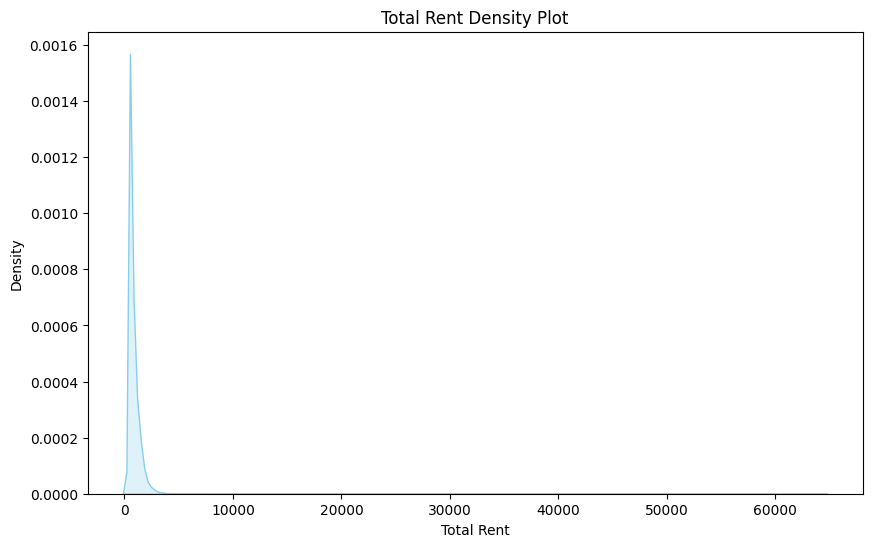

In [18]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['totalRent'], shade=True, color='skyblue')
plt.xlabel('Total Rent')
plt.ylabel('Density')
plt.title('Total Rent Density Plot')
plt.show()

In [19]:
# The tail on the right is too long, so I think the data needs to be adjusted.data['totalRent'].describe()
data['totalRent'].describe()

count    226473.000000
mean        810.712646
std         585.551102
min           0.000000
25%         469.000000
50%         649.000000
75%         980.000000
max       64651.000000
Name: totalRent, dtype: float64

In [20]:
Q1 = data['totalRent'].quantile(0.25)
Q3 = data['totalRent'].quantile(0.75)

# IQR
IQR = Q3 - Q1

# boundary calculation
lower_bound = Q1 - 1.5 * IQR
upper_bound = 10000

# Delete data that are not in the zone
data = data[(data['totalRent'] >= lower_bound) & (data['totalRent'] <= upper_bound)]

C:\Users\piano\AppData\Local\Temp\ipykernel_25540\3981236610.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['totalRent'], shade=True, color='skyblue')


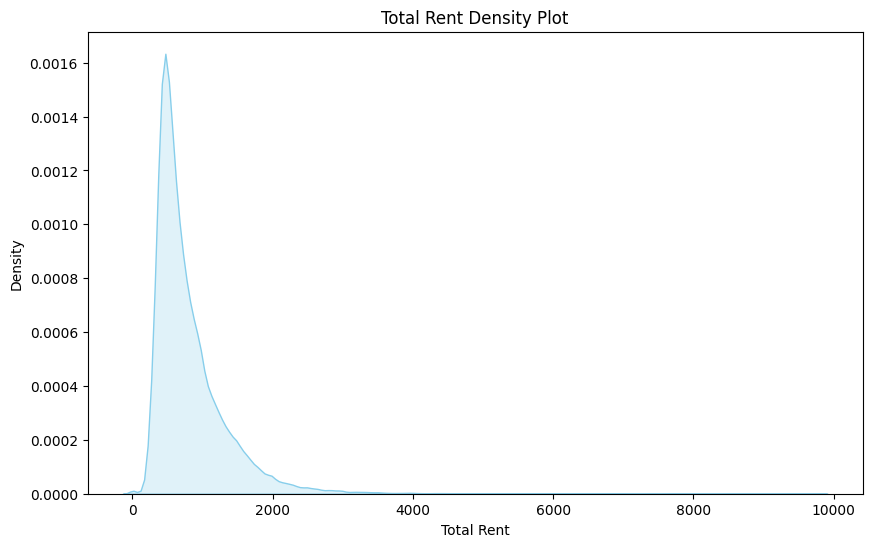

In [21]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['totalRent'], shade=True, color='skyblue')
plt.xlabel('Total Rent')
plt.ylabel('Density')
plt.title('Total Rent Density Plot')
plt.show()

C:\Users\piano\AppData\Local\Temp\ipykernel_25540\3233157533.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['totalRent'], shade=True, color='skyblue')


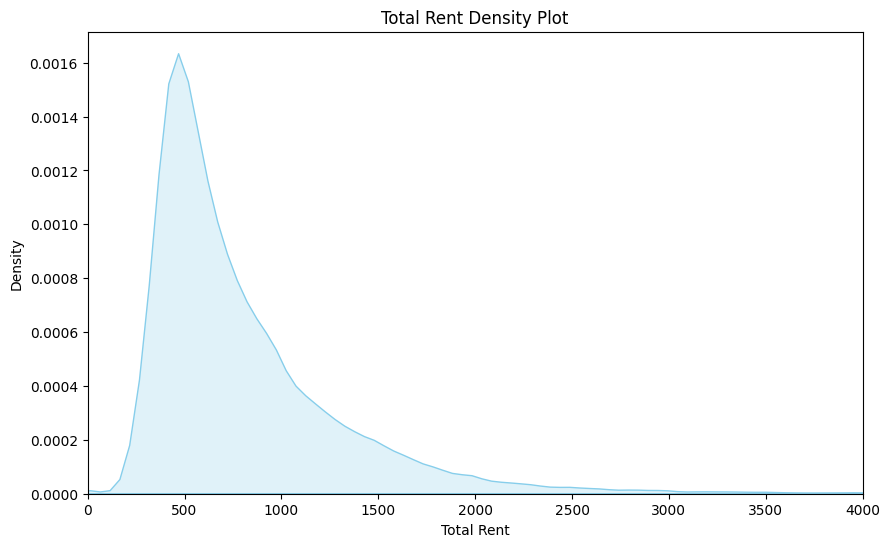

In [22]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data['totalRent'], shade=True, color='skyblue')
plt.xlabel('Total Rent')
plt.ylabel('Density')
plt.title('Total Rent Density Plot')
plt.xlim(0, 4000)
plt.show()

In [23]:
data['totalRent'].describe()

count    226465.000000
mean        809.536799
std         535.817365
min           0.000000
25%         469.000000
50%         649.000000
75%         980.000000
max        9774.000000
Name: totalRent, dtype: float64

# Part 2 / Geopandas& Geodata

In [24]:
geo_data = gp.read_file("plz-5stellig.shp")

In [25]:
geo_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 8170 entries, 0 to 8169
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   plz        8170 non-null   object  
 1   note       8170 non-null   object  
 2   einwohner  8170 non-null   int64   
 3   qkm        8170 non-null   float64 
 4   geometry   8170 non-null   geometry
dtypes: float64(1), geometry(1), int64(1), object(2)
memory usage: 319.3+ KB


In [26]:
geo_data.head(10)

plz                                               note  einwohner  \
0  64743  Situation unklar, evtl. haben die HÃ¤user Marb...          3   
1  81248                                     81248 MÃ¼nchen        121   
2  60315                     60315 Frankfurt am Main (FOUR)          0   
3  99331                                      99331 Geratal       4523   
4  60312                 60312 Frankfurt am Main (Omniturm)          0   
5  98694                                      98694 Ilmenau       7028   
6  39628                                      39628 Bismark       3147   
7  64760                                     64760 Oberzent      10503   
8  35647                                    35647 Waldsolms       4855   
9  31195                                   31195 Lamspringe       5876   

          qkm                                           geometry  
0    0.082066  POLYGON ((8.98124 49.60761, 8.98312 49.60748, ...  
1    1.984763  POLYGON ((11.40526 48.16042, 11.40655 48.15678...  
2    0.017285  POLYGON ((8.67254 50.11264, 8.67320 50.11266, ...  
3   20.207080  POLYGON ((10.84048 50.74605, 10.84008 50.74421...  
4    0.001829  POLYGON ((8.67262 50.11164, 8.67311 50.11182, ...  
5   80.375011  MULTIPOLYGON (((10.84019 50.64627, 10.84409 50...  
6  125.135930  POLYGON ((11.58895 52.61676, 11.59058 52.61680...  
7  165.476886  POLYGON ((8.88883 49.60938, 8.89054 49.60985, ...  
8   44.716972  MULTIPOLYGON (((8.43650 50.46646, 8.44045 50.4...  
9   70.492464  POLYGON ((9.89197 51.96897, 9.89831 51.96569, ...

<Axes: >

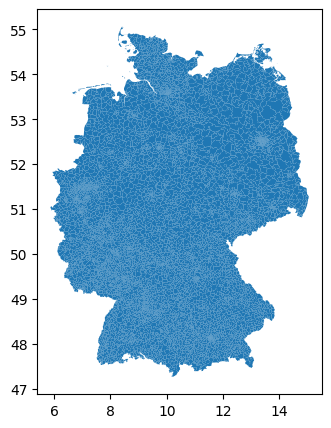

In [27]:
geo_data.plot(figsize=(5,5))

In [28]:
odata = pd.read_csv("immo_data.csv")
subset_data = odata[['regio2', 'geo_plz']]
subset_data.to_csv("subset_immo_data.csv", index=False)

# Part 3 / Visualization

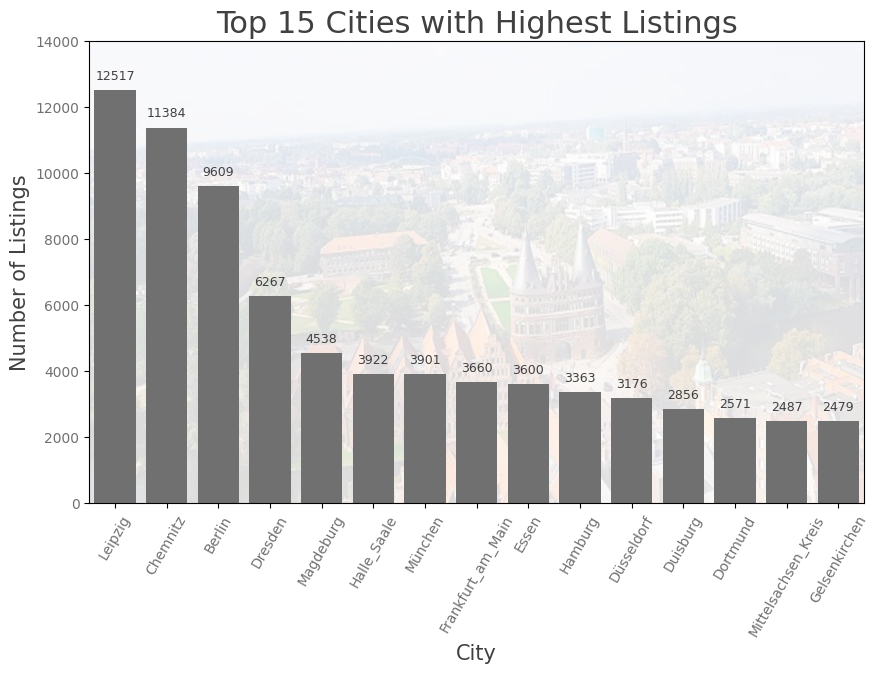

In [91]:
gray_color = '#989898' # Hexadecimal code!!
dark_gray_color = '#707070'
more_dark_gray_color = '#404040'
background_image = Image.open('germancity_1.jpg')

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(background_image, extent=[-0.5, 14.5, 0, 20000], aspect='auto', alpha=0.15)
top_cities = data['regio2'].value_counts().head(15)
barplot = sns.barplot(x=top_cities.index, y=top_cities.values, color=dark_gray_color, ax=ax)

for p in barplot.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=9, color=more_dark_gray_color)

plt.xticks(rotation=60, color=dark_gray_color)
plt.yticks(color=dark_gray_color)
plt.ylim(0, 14000)
plt.xlabel('City', size=15, color=more_dark_gray_color)
plt.ylabel('Number of Listings', size=15, color=more_dark_gray_color)
plt.title('Top 15 Cities with Highest Listings', size=22, color= more_dark_gray_color)
plt.show()


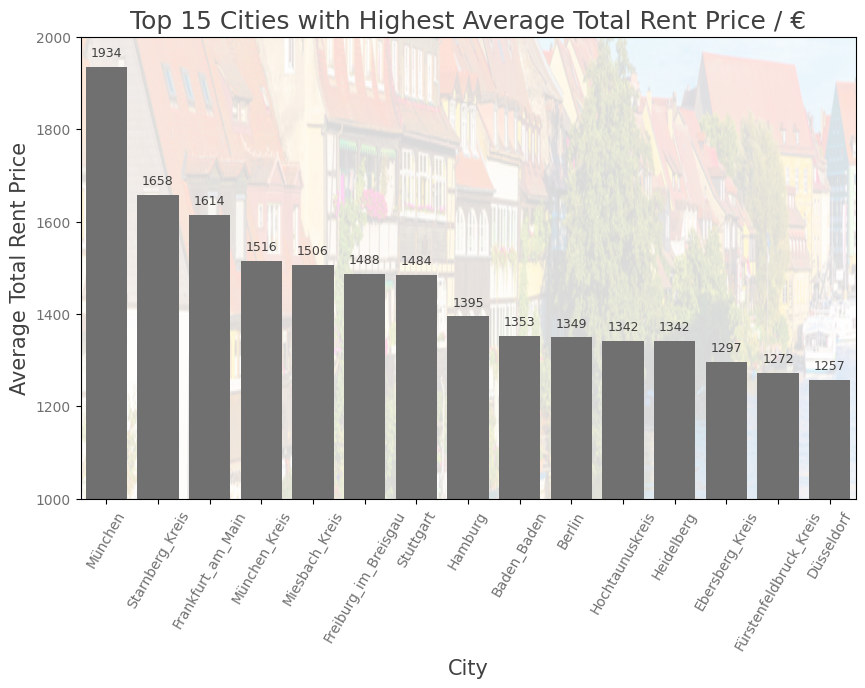

In [90]:
mean_rent_by_regio2 = data.groupby('regio2')['totalRent'].mean().reset_index()
top_15_cities = mean_rent_by_regio2.sort_values(by='totalRent', ascending=False).head(15)

background_image = Image.open('germancity_2.jpg')
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(background_image, extent=[-0.5, 14.5, 0, 3000], aspect='auto', alpha=0.15)
barplot = sns.barplot(x='regio2', y='totalRent', data=top_15_cities, color=dark_gray_color, ax=ax)

for p in barplot.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=9, color=more_dark_gray_color)

plt.xticks(rotation=60, color=dark_gray_color)
plt.yticks(color=dark_gray_color)
plt.xlabel('City', size=15, color=more_dark_gray_color)
plt.ylabel('Average Total Rent Price', size=15, color=more_dark_gray_color)
plt.title('Top 15 Cities with Highest Average Total Rent Price / €', size=18, color= more_dark_gray_color)
plt.ylim(1000, 2000)

plt.show()


In [29]:
# Shapefile load
shapefile_path = 'plz-5stellig.shp'

mean_rent_by_regio2 = data.groupby('regio2')['totalRent'].mean().reset_index()
top_15_cities = mean_rent_by_regio2.sort_values(by='totalRent', ascending=False).head(24)

germany_shapes = gp.read_file(shapefile_path)

# PLZ Matching
top_cities_plz = data[data['regio2'].isin(top_15_cities['regio2'])].drop_duplicates(subset=['regio2'])

germany_shapes['plz'] = germany_shapes['plz'].astype(str)
top_cities_plz['geo_plz'] = top_cities_plz['geo_plz'].astype(str)

# Shapefile Matching
mapped_data = germany_shapes.merge(top_cities_plz, left_on='plz', right_on='geo_plz')

# Extract lat and lon from the center of goe
mapped_data['lon'] = mapped_data.geometry.apply(lambda x: x.centroid.x)
mapped_data['lat'] = mapped_data.geometry.apply(lambda x: x.centroid.y)

mapped_data = mapped_data.set_index('regio2').reindex(top_15_cities['regio2']).reset_index()


# Plotly map creation
fig = px.scatter_mapbox(
    mapped_data,
    lat='lat',
    lon='lon',
    hover_name='regio2',
    zoom=5,
    center={"lat": 51.1657, "lon": 10.4515},
    mapbox_style="open-street-map",
    size_max=20,  
    color='regio2',  
    size='totalRent'  
)


fig.update_layout(
    title_text="Top 24 Cities in Germany by Average Total Rent",
    title_font=dict(size=20),
    margin={"r": 0, "t": 40, "l": 0, "b": 0},
    paper_bgcolor="rgba(245,245,245,1)")

#Legend
fig.update_layout(
    legend=dict(
        title=("<- Circle size = Costs"),  
        x=1,                  
        y=1,                
        bordercolor="Black",   
        borderwidth=0.5       
    ))

fig.show()

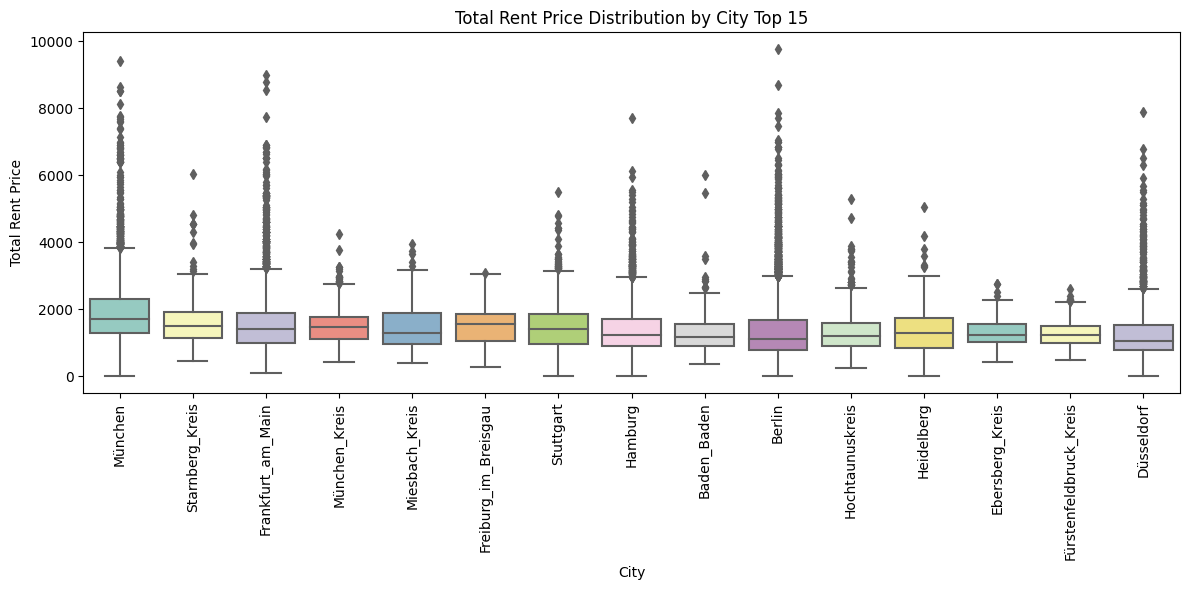

In [99]:
top_15_cities = (
    data.groupby('regio2')['totalRent']
    .mean()
    .reset_index()
    .sort_values(by='totalRent', ascending=False)
    .head(15)
)

top_15_regio2 = top_15_cities['regio2']
top_regio2_data = data[data['regio2'].isin(top_15_regio2)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='regio2', y='totalRent', data=top_regio2_data, order=top_15_regio2, palette="Set3")
plt.xticks(rotation=90)
plt.xlabel('City')
plt.ylabel('Total Rent Price')
plt.title('Total Rent Price Distribution by City Top 15')
plt.tight_layout()
plt.show()

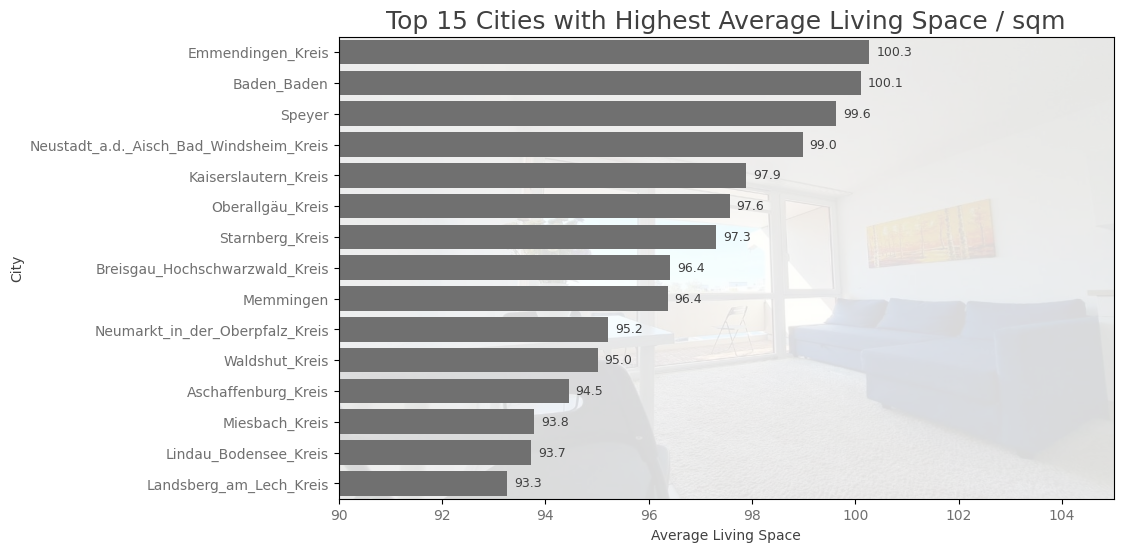

In [105]:
mean_livingspace_by_regio2 = data.groupby('regio2')['livingSpace'].mean().reset_index()

top_15_cities_livingspace = (
    mean_livingspace_by_regio2
    .sort_values(by='livingSpace', ascending=False)
    .head(15)
)

background_image = Image.open('germancity_7_apt.jpg')
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(background_image, extent=[90, 105, -0.5, 15], aspect='auto', alpha=0.15, origin='lower')
barplot = sns.barplot(x='livingSpace', y='regio2', data=top_15_cities_livingspace, color=dark_gray_color, ax=ax)

for p in barplot.patches:
    ax.annotate(f'{p.get_width():.1f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'left', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points',
                fontsize=9, color=more_dark_gray_color) 


plt.xlabel('Average Living Space', color=more_dark_gray_color)
plt.ylabel('City', color=more_dark_gray_color)
plt.xticks(color=dark_gray_color)
plt.yticks(color=dark_gray_color)
plt.title('Top 15 Cities with Highest Average Living Space / sqm', size=18, color=more_dark_gray_color)
plt.xlim(90, 105)

plt.show()

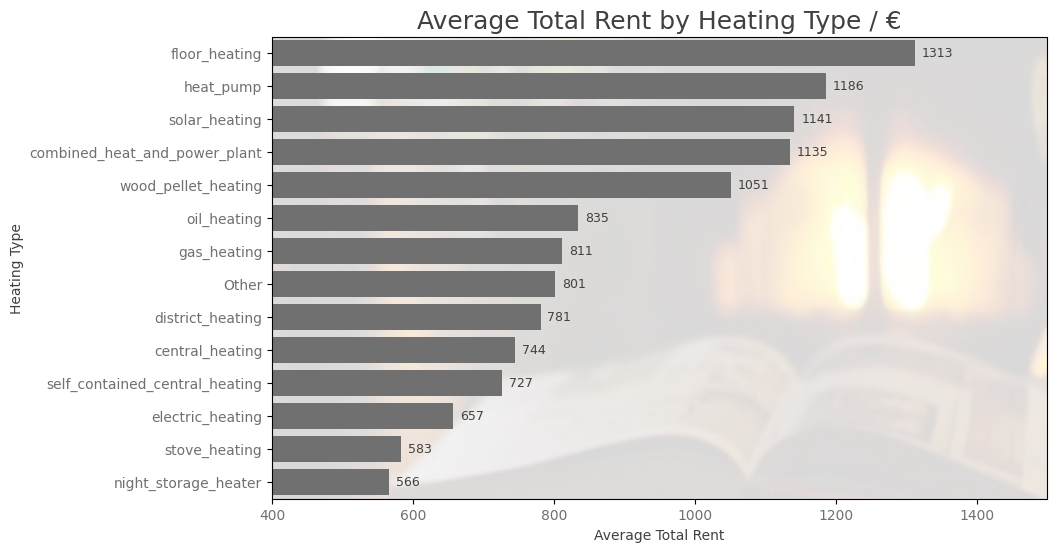

In [107]:
mean_totalrent_by_heatingtype = data.groupby('heatingType')['totalRent'].mean().reset_index()

sorted_heatingtype_totalrent = mean_totalrent_by_heatingtype.sort_values(by='totalRent', ascending=False)

background_image = Image.open('germancity_10_heating.jpg')
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(background_image, extent=[0, 2000, -15, 20], aspect='auto', alpha=0.15, origin='lower')
barplot = sns.barplot(x='totalRent', y='heatingType', data=sorted_heatingtype_totalrent, color=dark_gray_color, ax=ax)

for p in barplot.patches:
    ax.annotate(f'{p.get_width():.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'left', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points',
                fontsize=9, color=more_dark_gray_color)

plt.xlabel('Average Total Rent', color=more_dark_gray_color)
plt.ylabel('Heating Type', color=more_dark_gray_color)
plt.xticks(color=dark_gray_color)
plt.yticks(color=dark_gray_color)
plt.title('Average Total Rent by Heating Type / €', size=18, color=more_dark_gray_color)
plt.xlim(400, 1500)

plt.show()

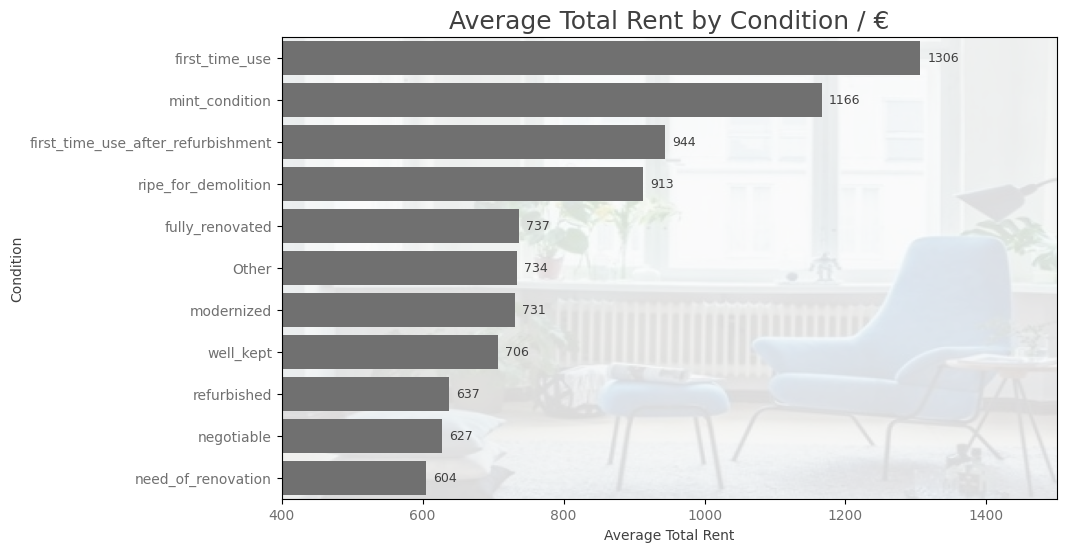

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import pandas as pd

mean_totalrent_by_heatingtype = data.groupby('condition')['totalRent'].mean().reset_index()

sorted_heatingtype_totalrent = mean_totalrent_by_heatingtype.sort_values(by='totalRent', ascending=False)

background_image = Image.open('germancity_11_apt.jpg')
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(background_image, extent=[0, 2000, -5, 12], aspect='auto', alpha=0.15, origin='lower')

barplot = sns.barplot(x='totalRent', y='condition', data=sorted_heatingtype_totalrent, color=dark_gray_color, ax=ax)

for p in barplot.patches:
    ax.annotate(f'{p.get_width():.0f}', 
                (p.get_width(), p.get_y() + p.get_height() / 2.), 
                ha = 'left', va = 'center', 
                xytext = (5, 0), 
                textcoords = 'offset points',
                fontsize=9, color=more_dark_gray_color)

plt.xlabel('Average Total Rent', color=more_dark_gray_color)
plt.ylabel('Condition', color=more_dark_gray_color)
plt.xticks(color= dark_gray_color)
plt.yticks(color= dark_gray_color)
plt.title('Average Total Rent by Condition / €', size=18, color=more_dark_gray_color)
plt.xlim(400, 1500)

plt.show()


<IPython.core.display.Javascript object>


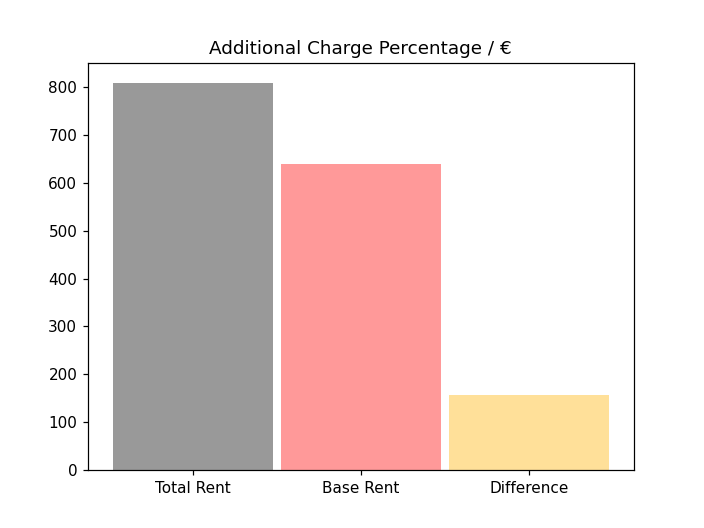

In [30]:
# Please use %matplotlib notebook
%matplotlib notebook
from matplotlib.animation import FuncAnimation

total_rent_mean = np.mean(data['totalRent'])
base_rent_mean = np.mean(data['baseRent'])
difference = total_rent_mean - base_rent_mean

fig, ax = plt.subplots()
bar_width = 0.35
opacity = 0.8

# 1000ms / 50ms = 20 frames
pause_frames = int(5000 / 50)

light_black = (0.5, 0.5, 0.5) 
light_red = (1, 0.5, 0.5)     
light_gold = (1, 0.85, 0.5)    

positions = np.arange(3) 
bar_width = 0.95  

def animate_with_percentage_and_pause(i):
    if i <= 25:  # First bar
        ax.clear()
        ax.bar(positions[0], total_rent_mean * i / 25, bar_width, alpha=opacity, color=light_black, label='Total Rent')
    elif i <= 50:  # Second bar
        ax.clear()
        ax.bar(positions[0], total_rent_mean, bar_width, alpha=opacity, color=light_black, label='Total Rent')
        ax.bar(positions[1], base_rent_mean * (i - 25) / 25, bar_width, alpha=opacity, color=light_red, label='Base Rent')
    elif i <= 75:  # Third Bar
        ax.clear()
        ax.bar(positions[0], total_rent_mean, bar_width, alpha=opacity, color=light_black, label='Total Rent')
        ax.bar(positions[1], base_rent_mean, bar_width, alpha=opacity, color=light_red, label='Base Rent')
        ax.bar(positions[2], difference * (i - 50) / 25, bar_width, alpha=opacity, color=light_gold, label='Difference')

    if i == 75:  # Figure
        percentage = (difference / total_rent_mean) * 100  # percentage caculation 
        ax.text(positions[2], difference, f'{percentage:.2f}%', ha='center', va='bottom')

    ax.set_title('Additional Charge Percentage / €')
    ax.set_xticks(positions)
    ax.set_xticklabels(['Total Rent', 'Base Rent', 'Difference'])

# Run animation (pause for 5 seconds after displaying numbers)
ani = FuncAnimation(fig, animate_with_percentage_and_pause, frames=np.arange(0, 75 + pause_frames + 1), interval=50, repeat=True, blit=True)

plt.show()


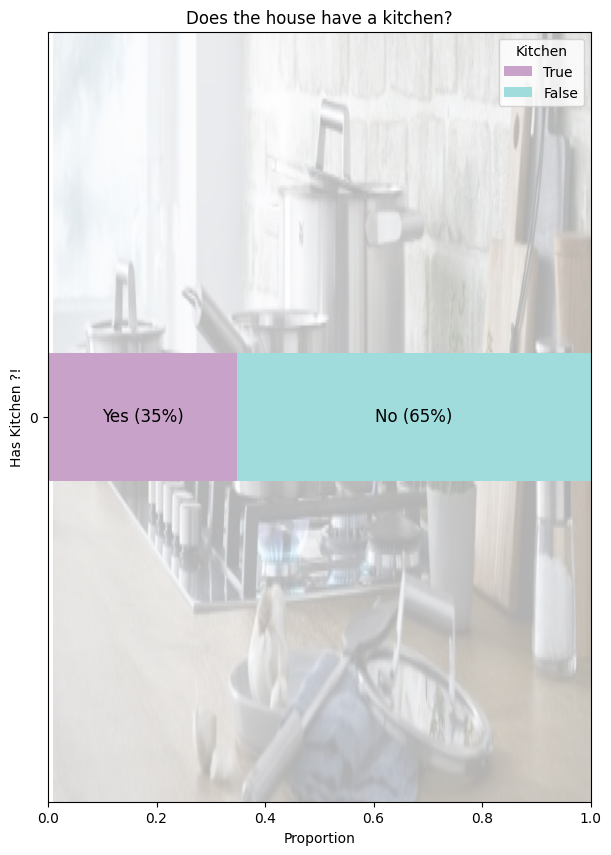

In [35]:
kitchen_count = data['hasKitchen'].value_counts(normalize=True)  

true_count = kitchen_count.get(True, 0)
false_count = kitchen_count.get(False, 0)

df = pd.DataFrame({'True': [true_count], 'False': [false_count]})

background_image = Image.open('germancity_12_kitchen.jpeg')

fig, ax = plt.subplots(figsize=(7, 10))
ax.imshow(background_image, extent=[0.01, 1, -0.7, 1.2], aspect='auto', alpha=0.3)

light_lilac = (200/255, 162/255, 200/255)
light_turquoise = (160/255, 220/255, 220/255)

# horizontal Stacked Bar Chart 
barplot = df.plot(kind='barh', stacked=True, color=[light_lilac, light_turquoise], ax=ax, width=0.1)

# Insert text in the bars
for bar in barplot.patches:
    width = bar.get_width()
    label_x_pos = bar.get_x() + width / 2
    text = 'Yes' if bar.get_x() < 0.1 else 'No'
    percentage = f'{width:.0%}'
    ax.text(label_x_pos, bar.get_y() + bar.get_height()/2, f'{text} ({percentage})', 
            ha='center', va='center', fontsize=12) 

plt.title('Does the house have a kitchen?')
plt.xlabel('Proportion')
plt.ylabel('Has Kitchen ?!')
plt.yticks(rotation=0)  # rotate y axis lable 
plt.legend(title='Kitchen')

plt.xlim(0, 1.0)

plt.show()



## End of Document 

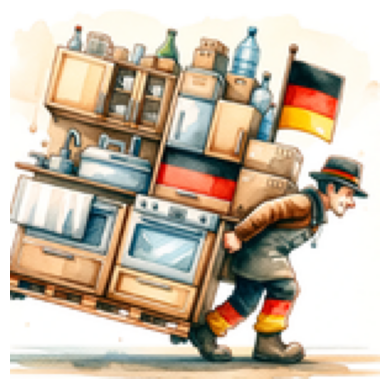

In [36]:
image_path = "germany_kitchen_1.png" 
img = Image.open(image_path)

new_width = 150  
new_height = 150 
img = img.resize((new_width, new_height), Image.LANCZOS)

plt.imshow(img)
plt.axis('off') 
plt.show()